In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load data

In [2]:
d = pd.read_csv('Data_Cortex_Nuclear.csv.gz')

## Data pre-processing

In [3]:
# take a peek
d.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [4]:
# turn MouseID into a true multi-index
multi = pd.MultiIndex.from_tuples( [ tuple(s.split('_')) for s in d['MouseID'] ], names=('mouse_id','replicate_id') )
d = d.set_index(multi)

In [5]:
# pivot data frame to facilitate facet plotting
e = pd.DataFrame(d.stack())

In [6]:
e.index.names = ['mouse_id','replicate_id','protein']

In [7]:
e.reset_index(inplace=True)

In [8]:
# only keep protein expression columns
e = e[ ['_N' in s for s in e['protein']] ]

In [9]:
# summarize per mouse data (for reference)
d.drop([ c for c in d.columns if '_N' in c ],axis=1).groupby( level=0 ).head(1)

,,MouseID,Genotype,Treatment,Behavior,class
mouse_id,replicate_id,,,,,
309,1,309_1,Control,Memantine,C/S,c-CS-m
311,1,311_1,Control,Memantine,C/S,c-CS-m
320,1,320_1,Control,Memantine,C/S,c-CS-m
321,1,321_1,Control,Memantine,C/S,c-CS-m
322,1,322_1,Control,Memantine,C/S,c-CS-m
3415,1,3415_1,Control,Memantine,C/S,c-CS-m
3499,1,3499_1,Control,Memantine,C/S,c-CS-m
3507,1,3507_1,Control,Memantine,C/S,c-CS-m
3520,1,3520_1,Control,Memantine,C/S,c-CS-m


In [10]:
e = e.rename( {0:'value'}, axis='columns' )

In [11]:
# log(expression) pulls out more information from the low expressors
import math
e['log_ex'] = [ math.log(a+0.1) for a in e['value'] ]

## Plot protein expression levels by replicate ID for the first 6 control mice (all same treatment)

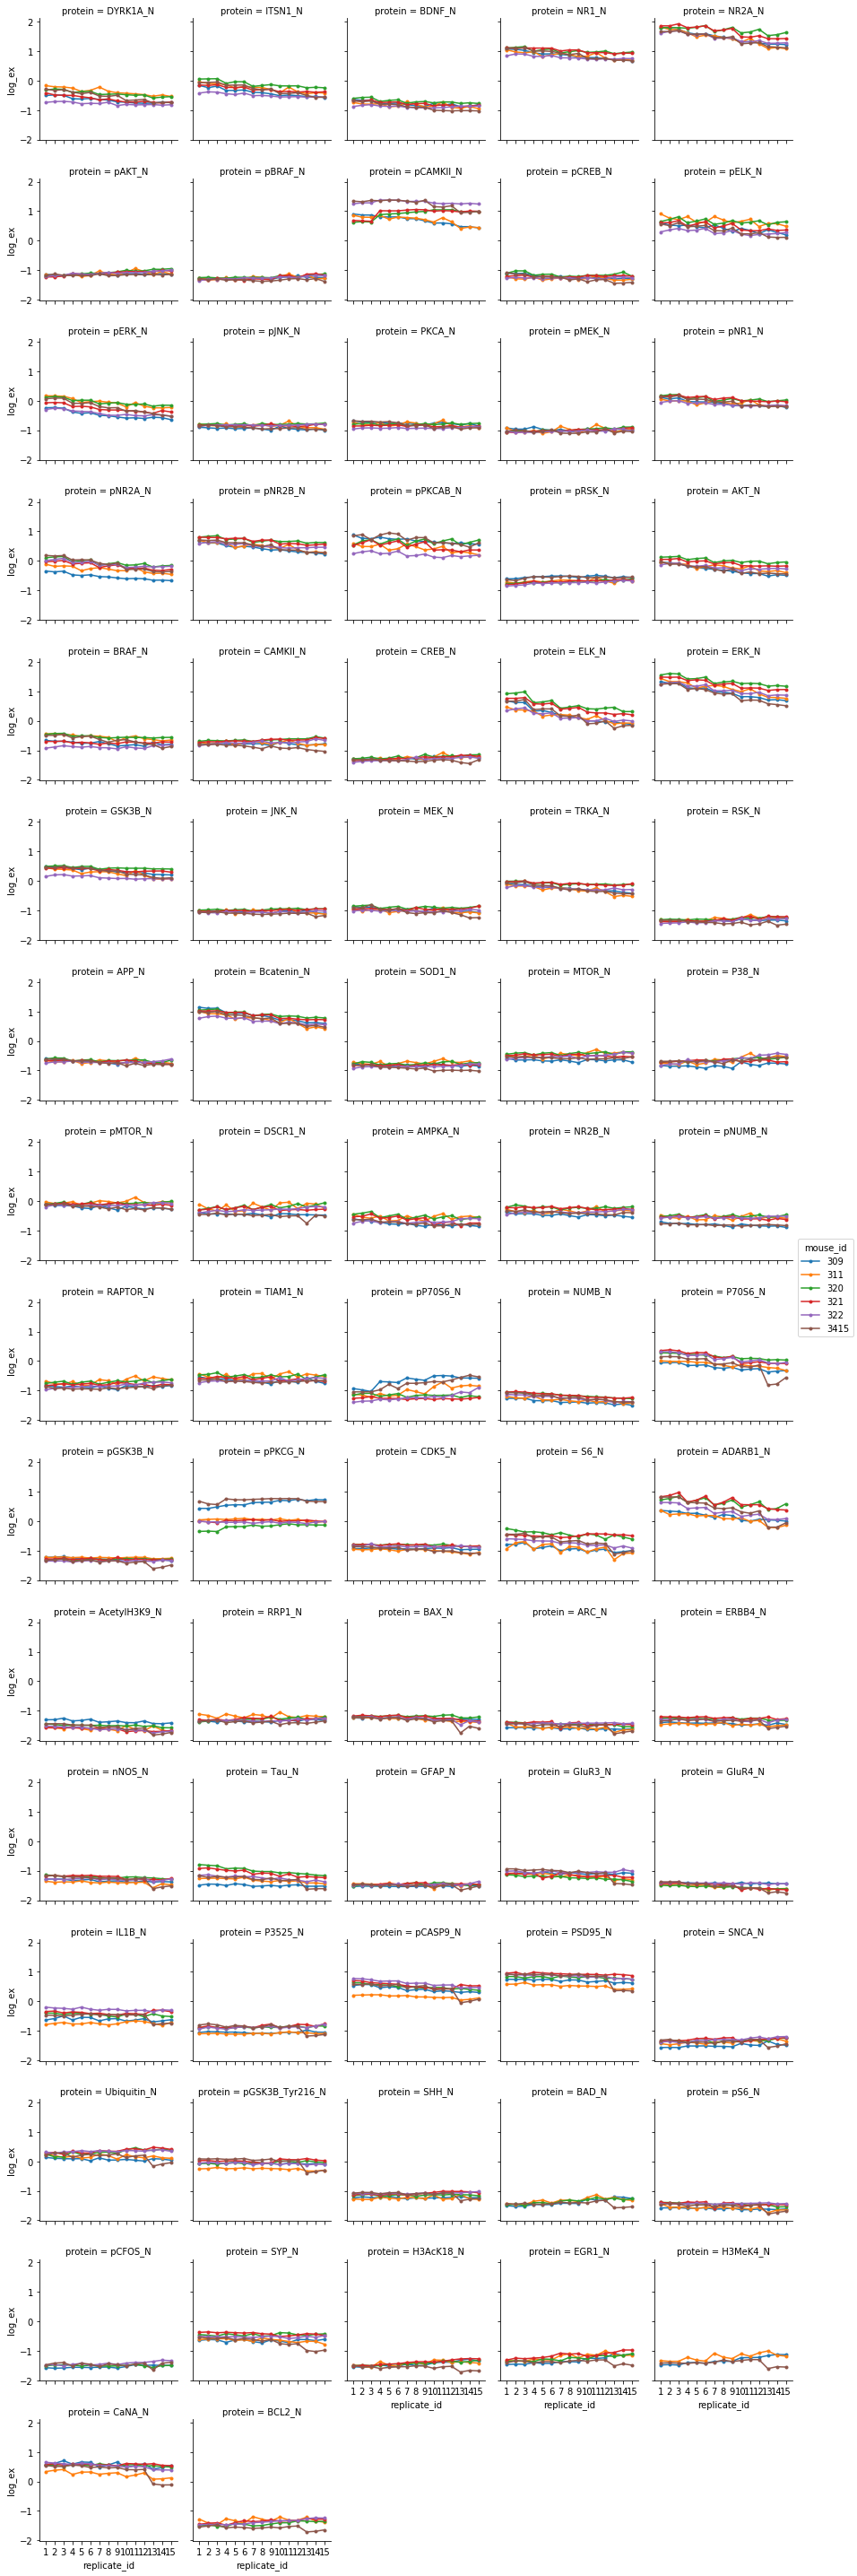

In [12]:
i = e['mouse_id'].isin(('309','311','320','321','322','3415'))
g = sns.FacetGrid(e[i], col="protein", hue='mouse_id', col_wrap=5, size=2.5)
g = g.map(plt.plot, "replicate_id", 'log_ex', marker=".").add_legend()

Notes:
- There's clearly a per-mouse effect.  Some mice have systematically high/low protein levels.  Suggests that normalizing by mouse id is warranted.
- There's clearly a per-replicate effect.  There is a large subset of proteins where the expression level decreases or increases as a function of the replicate number.
- There's clearly a periodicity within the per-replicate effect.  It looks like various protein curves follow a periodicity-3 pattern.  We could call these triads a "replicate batch".
- Something went systematically wrong for the last three replicates of mouse 3415.  This kind of observation would suggest that there's also a mouse_id * replicate_batch_id effect.
- Overall this brings serious questions to the utility of these replicates.  The SOM analysis paper and the blurb at kaggle say that the replicates form independent measurements of the same protein response, but all of these observations make it clear that this is far from true.  Without more information it's entirely unclear how to reduce the 15 replicates into a single measurement value.  Our best hope is that the replicate effects are reproduced across all mice, and if we analyze replicates as separate experiments, we can recover some statistical power.

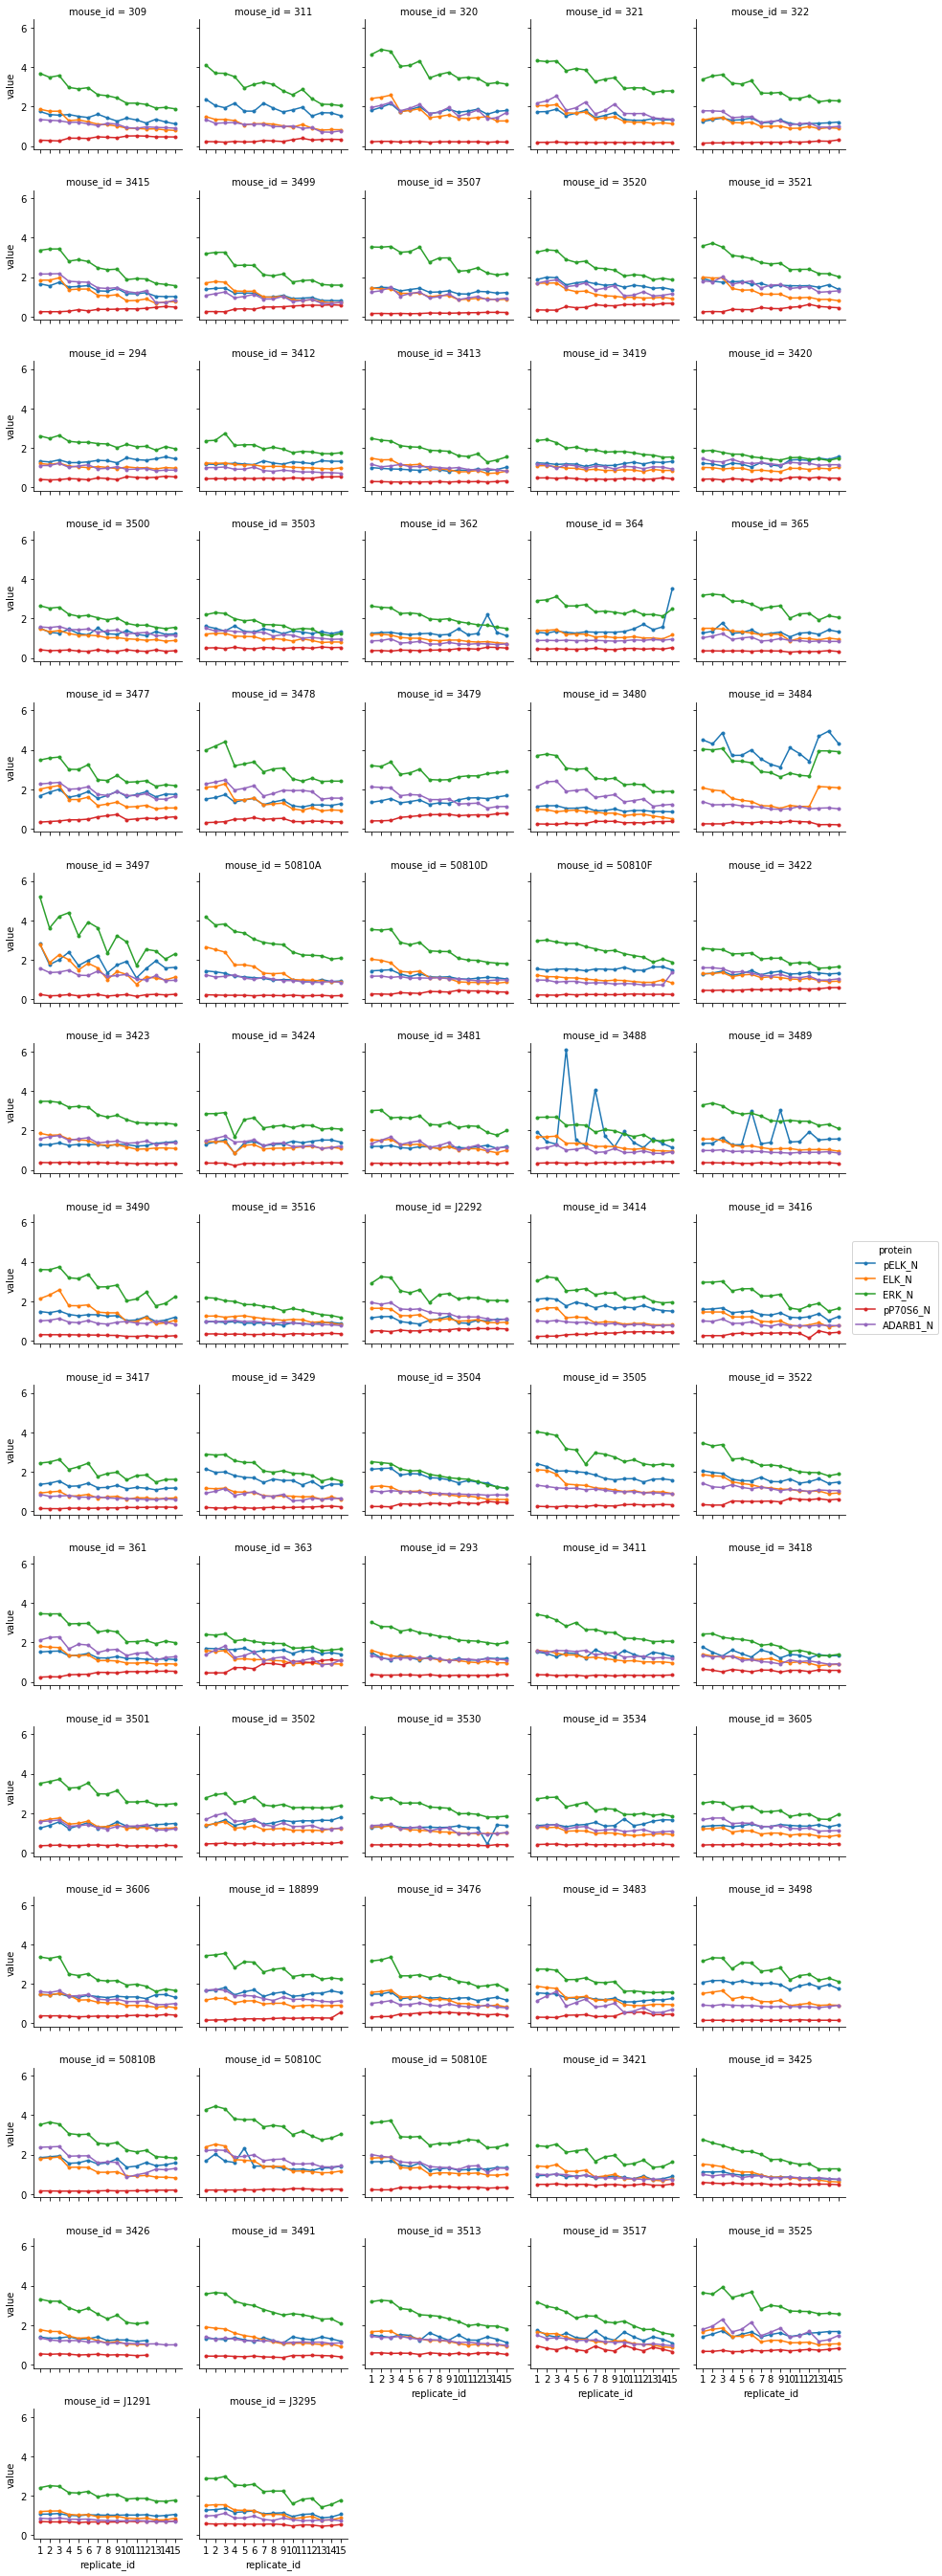

In [13]:
i = e['protein'].isin( ('ELK_N','ADARB1_N','pP70S6_N','ERK_N','pELK_N'))
g = sns.FacetGrid(e[i], col="mouse_id", hue='protein', col_wrap=5, size=2.5)
g = g.map(plt.plot, "replicate_id", 'value', marker=".").add_legend()

Notes:
- Every mouse repeats the same story that replicate_id is a dominant effect in the observed expression level.
- The replicate effects are mostly consistent across mice; this would permit a treatment where we analyze each
replicate as a separate experiment.  However, while the majority of mice exhibit the period-3 pattern, some mice
don't show this and others have a phase offset in the period-3 behavior (e.g. 3497).
- While not as powerful as a full mixed-effects model, we might be able to proceed by considering each replicate as
a separate experiment and requiring our putative correlations to be significant across a
majority (or more) of the replicates.